In [1]:
import numpy as np
import scipy
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(100)

In [3]:
mean = np.array([3,5])
cov = np.array([[2,1],[1,2]])
N = 2000

In [4]:
sample = np.random.multivariate_normal(mean,cov,size=N)

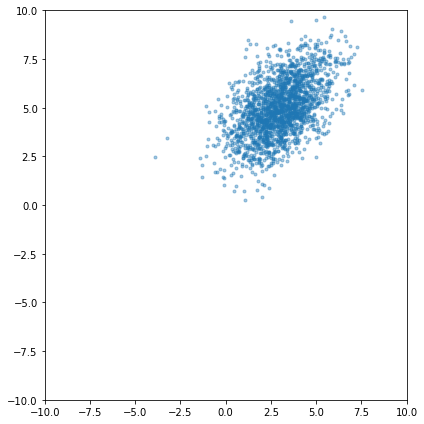

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(sample[:,0],sample[:,1],'.',alpha=0.4)
#sns.kdeplot(sample[:,0],sample[:,1], ax=ax, color='k')
ax.set(xlim=[-10,10],ylim=[-10,10])
plt.tight_layout()

In [6]:
x = sample - sample.mean(axis=0)

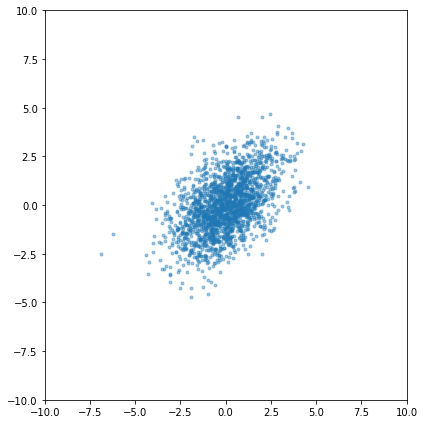

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x[:,0],x[:,1],'.',alpha=0.4)
#sns.kdeplot(x[:,0],x[:,1], ax=ax, color='k')
ax.set(xlim=[-10,10],ylim=[-10,10])
plt.tight_layout()

In [8]:
covariance_matrix = x.T.dot(x)/N

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [10]:
eigenvalues

array([ 3.15791461,  1.03508165])

In [11]:
eigenvectors

array([[ 0.71656004, -0.69752542],
       [ 0.69752542,  0.71656004]])

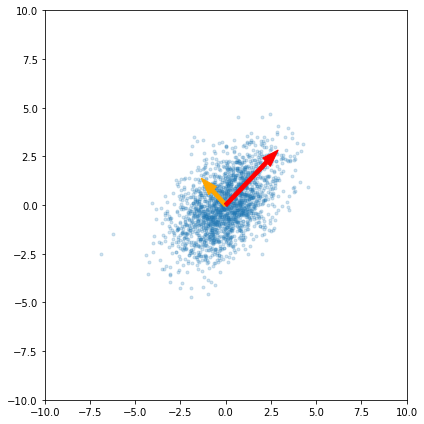

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
ax.arrow(0,0, eigenvalues[0]*eigenvectors[0,0], eigenvalues[0]*eigenvectors[1,0], width=0.2, color='red',zorder=2)
ax.arrow(0,0, eigenvalues[1]*eigenvectors[0,1], eigenvalues[1]*eigenvectors[1,1], width=0.2, color='orange',zorder=1)
ax.plot(x[:,0],x[:,1],'.',alpha=0.2,zorder=0)
ax.set(xlim=[-10,10],ylim=[-10,10])
plt.tight_layout()

# Example mixture of multivariate gaussians

In [13]:
mean1 = np.array([3,5,5])
mean2 = np.array([1,2,3])
cov1 = np.array([[2,1,1],[1,2,1],[1,1,2]])
cov2 = np.array([[1,-0.5,0.5],[-0.5,1,-0.5],[0.5,-0.5,1]])
N1 = N2 = 1000

In [14]:
sample1 = np.random.multivariate_normal(mean1,cov1,size=N1)
sample2 = np.random.multivariate_normal(mean2,cov2,size=N2)

In [15]:
sample = np.vstack([sample1,sample2])

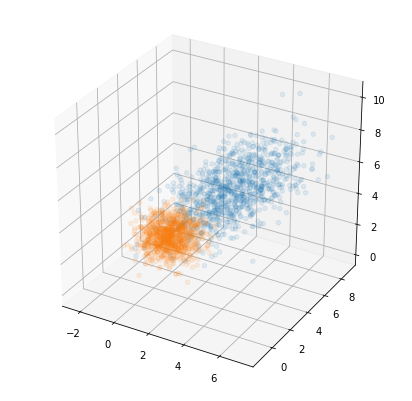

In [16]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(sample[:N1,0],sample[:N1,1],sample[:N1,2],alpha=0.1)
ax.scatter(sample[N1:,0],sample[N1:,1],sample[N1:,2],alpha=0.1)

In [17]:
x = sample - sample.mean(axis=0)

In [18]:
covariance_matrix = x.T.dot(x)/(N1+N2)

In [19]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [20]:
eigenvalues

array([ 6.49211488,  0.7285663 ,  1.45664108])

In [21]:
x.dot(eigenvectors)

array([[-5.69606993,  0.75291493,  0.89389836],
       [-2.68289156, -2.37229167,  2.67728794],
       [-0.84350253, -0.32989405,  0.98119944],
       ..., 
       [ 1.17613908, -0.47931044,  1.6166919 ],
       [ 0.68203394,  0.74097718,  1.8999498 ],
       [ 1.41920941,  0.1535524 ,  0.70924283]])

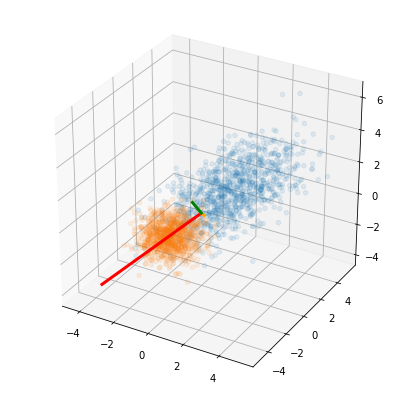

In [30]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x[:N1,0],x[:N1,1],x[:N1,2],alpha=0.1)
ax.scatter(x[N1:,0],x[N1:,1],x[N1:,2],alpha=0.1)
ax.plot([0,eigenvalues[0]*eigenvectors[0,0]],[0,eigenvalues[0]*eigenvectors[1,0]],[0,eigenvalues[0]*eigenvectors[2,0]],color='red',lw=3)
ax.plot([0,eigenvalues[2]*eigenvectors[0,2]],[0,eigenvalues[2]*eigenvectors[1,2]],[0,eigenvalues[2]*eigenvectors[2,2]],color='orange',lw=3)
ax.plot([0,eigenvalues[1]*eigenvectors[0,1]],[0,eigenvalues[1]*eigenvectors[1,1]],[0,eigenvalues[1]*eigenvectors[2,1]],color='green',lw=3)

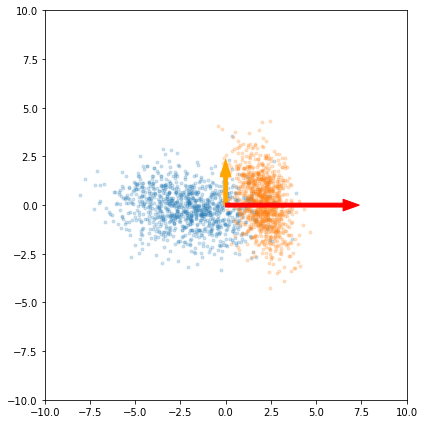

In [22]:
fig, ax = plt.subplots(figsize=(6,6))
ax.arrow(0,0, eigenvalues[0], 0, width=0.2, color='red',zorder=2)
ax.arrow(0,0, 0, eigenvalues[2], width=0.2, color='orange',zorder=1)
ax.plot(x.dot(eigenvectors)[:N1,0],x.dot(eigenvectors)[:N1,2],'.',alpha=0.2,zorder=0)
ax.plot(x.dot(eigenvectors)[N1:,0],x.dot(eigenvectors)[N1:,2],'.',alpha=0.2,zorder=0)
ax.set(xlim=[-10,10],ylim=[-10,10])
plt.tight_layout()